In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [4]:
# Number of rows with 0 values

list1 = ['person_age','person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
         'loan_percent_income', 'cb_person_cred_hist_length']

for k in df[list1].columns:
    missing_rows = df.loc[df[k]==0].shape[0]
    print(k + ": " + str(missing_rows))

person_age: 0
person_income: 0
person_emp_length: 4105
loan_amnt: 0
loan_int_rate: 0
loan_percent_income: 9
cb_person_cred_hist_length: 0


In [5]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Drop NaN values from numerical columns
df0 = df.dropna(subset=numerical_cols)

df0

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [6]:
# Drop categorical columns
X = df0.drop(['loan_status', 'loan_intent', 'person_home_ownership', 'loan_grade', 
              'cb_person_default_on_file', 'person_home_ownership'], axis=1)
y = df0['loan_status']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                stratify = y,                                           
                                                test_size=0.25, 
                                                random_state=1)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Gradient Boosting

In [9]:
model1 = GradientBoostingClassifier(n_estimators = 500,
                                    learning_rate = 0.1,
                                    max_depth = 4, 
                                    random_state =1)
model1.fit(X_train_scaled,y_train)
model1.score(X_test_scaled,y_test)

0.8831005586592179

### GridSearchCV and 5-fold cross validation on learning_rate

In [10]:
model5 = GradientBoostingClassifier(n_estimators = 500,
                                      max_depth = 4, 
                                    random_state =1)

In [11]:
lrates = np.linspace(0.01,1.0,20)
lrates

array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ])

In [12]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state = 1)

In [13]:
params = dict(learning_rate = lrates)

In [14]:
grid2 = GridSearchCV(model5,param_grid = params,cv = kfold)
grid2.fit(X_train_scaled,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=GradientBoostingClassifier(max_depth=4, n_estimators=500,
                                                  random_state=1),
             param_grid={'learning_rate': array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ])})

In [15]:
# Best validation accuracy rate
grid2.best_score_

0.8767114547902264

In [16]:
grid2.best_params_

{'learning_rate': 0.11421052631578947}

In [17]:
# Best test accuracy rate
grid2.score(X_test_scaled,y_test)

0.8843575418994414

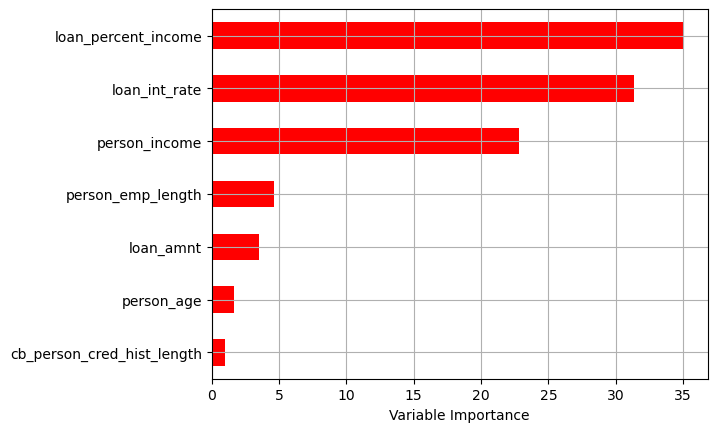

In [18]:
# Feature importance
Importance = grid2.best_estimator_.feature_importances_*100
Importance = pd.DataFrame({'Importance':Importance},\
                           index = X.columns)
df2 = Importance.sort_values(by = 'Importance',axis = 0,\
                              ascending = True)
df2.plot(kind = 'barh',color = 'r',legend = False)
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

In [19]:
df2

,Importance
cb_person_cred_hist_length,1.000527
person_age,1.663469
loan_amnt,3.490505
person_emp_length,4.623261
person_income,22.834270
loan_int_rate,31.316963
loan_percent_income,35.071006


In [20]:
yhat = grid2.predict(X_test_scaled)

In [21]:
df3 = pd.crosstab(y_test,yhat,
 rownames=['actual'],
 colnames=['predictions'])
df3

predictions,0,1
actual,,
0,5339,270
1,558,993


## Random Forest

In [22]:
forest = RandomForestClassifier(max_features = 5,
                                n_estimators = 500,
                                max_depth = 4,random_state = 1)
forest.fit(X_train_scaled,y_train)
forest.score(X_test_scaled,y_test)

0.865782122905028

### GridSearchCV on max_features

In [23]:
model3 = RandomForestClassifier(max_depth=4,n_estimators = 500,
                                random_state=1)

In [24]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state = 1)

In [25]:
features = range(1,8)
params = dict(max_features = features)

In [26]:
grid1 = GridSearchCV(model3,param_grid = params,cv = kfold)
grid1.fit(X_train_scaled,y_train);

In [27]:
# Best validation accuracy rate
grid1.best_score_

0.8650717997411567

In [28]:
grid1.best_params_

{'max_features': 4}

In [29]:
# Best test accuracy rate
grid1.score(X_test_scaled,y_test)

0.8650837988826816

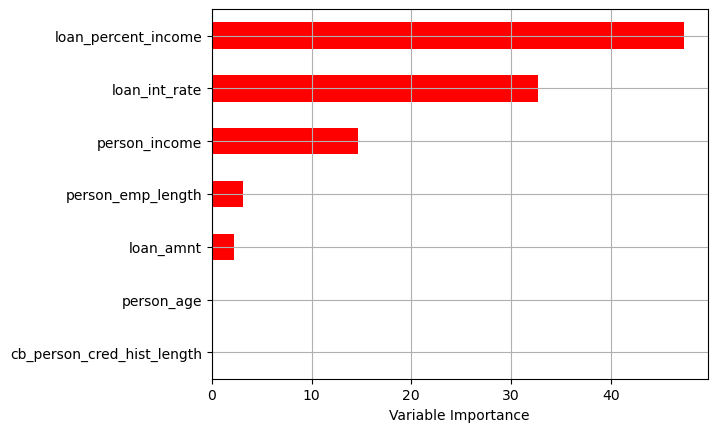

In [30]:
# Feature importance
Importance = grid1.best_estimator_.feature_importances_*100
Importance = pd.DataFrame({'Importance':Importance},\
                           index = X.columns)
df2 = Importance.sort_values(by = 'Importance',axis = 0,\
                              ascending = True)
df2.plot(kind = 'barh',color = 'r',legend = False)
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

In [31]:
df2

,Importance
cb_person_cred_hist_length,0.027736
person_age,0.031775
loan_amnt,2.190436
person_emp_length,3.088067
person_income,14.648220
loan_int_rate,32.679362
loan_percent_income,47.334404


In [32]:
yhat = grid1.predict(X_test_scaled)

In [33]:
df3 = pd.crosstab(y_test,yhat,
 rownames=['actual'],
 colnames=['predictions'])
df3

predictions,0,1
actual,,
0,5267,342
1,624,927
